In [ ]:
#!pip3 uninstall pandas

In [ ]:
#!pip3 install pandas==1.4.3

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import nltk
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import json
json.__version__

'2.0.9'

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#df=pd.read_json("/content/drive/My Drive/AMAZON_FASHION_5.json",lines=True)
import csv
df=pd.read_csv("/content/Arts_Crafts_and_Sewing_5_2.csv",quoting=csv.QUOTE_NONE,error_bad_lines=False)

<ipython-input-53-c8632fd3ae14>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("/content/Arts_Crafts_and_Sewing_5_2.csv",quoting=csv.QUOTE_NONE,error_bad_lines=False)


In [ ]:
'''
#Dropping duplicate reviews
df.drop_duplicates(subset=["reviewText"],inplace=True)
#Dropping unnecessary columns
df.drop(["overall","verified","reviewTime","reviewerName","asin","style","unixReviewTime","vote","image"],axis=1,inplace=True)
#Dropping null values
df.dropna(axis=0,inplace=True)
'''
df.dropna(axis=0,inplace=True)
df=df.head(60000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 60047
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   verified    60000 non-null  bool  
 1   reviewText  60000 non-null  object
 2   summary     60000 non-null  object
dtypes: bool(1), object(2)
memory usage: 1.4+ MB


In [ ]:
df.head(10)

,verified,reviewText,summary
0,True,Contains some interesting stitches.,Four Stars
1,True,I'm a fairly experienced knitter of the one-co...,My current favorite go-to guide for inspiration
2,True,Great book but the index is terrible. Had to w...,lots of great examples good instructions col...
3,True,I purchased the Kindle edition which is incred...,Another little gem by Melissa Leapman
4,True,Very well laid out and very easy to read. T...,Very comprehensive
5,True,"""Beginning her career as a freelance knitter ...",Great Addition to Any Stitch Library
6,True,"""This is a terrific stitch handbook (and I hav...",Count on Melissa
7,True,The book needs to be coil bound. The content i...,good book
8,True,I really am enjoying this book! I like the siz...,Excellent!
9,True,Just received this book and looked over it cov...,Great addition to my library


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
stop_words=set(stopwords.words('english'))

def text_cleaner(text,num)->str:
  new_string=text.lower()
  new_string = re.sub(r'\([^)]*\)', '', new_string)
  new_string= re.sub('"',"",new_string)
  new_string = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_string.split(" ")])
  new_string = re.sub(r"'s\b","",new_string)
  new_string = re.sub("[^a-zA-Z]", " ", new_string)
  new_string = re.sub('[m]{2,}', 'mm', new_string)

  if(num==0):
        tokens = [w for w in new_string.split() if not w in stop_words]
  else:
      tokens=new_string.split()
  long_words=[]
  for i in tokens:
      if len(i)>1:                                                 #removing short word
          long_words.append(i)
  return (" ".join(long_words)).strip()


In [ ]:
#call the function
cleaned_text = []
for t in df['reviewText']:
    cleaned_text.append(text_cleaner(str(t),0))

In [ ]:
cleaned_text[:5]

['contains interesting stitches',
 'fairly experienced knitter one color color block intarsia vein rather fair isle maestro loved best stitch guide multitude reversible stitch patterns offered shown reverse obverse knit love accumulate guides stitch dictionaries pattern books design project books great resource find always adapting knitting patterns slightly significantly swap cables add interesting borders knit edges body time gives enough classic stitches satisfy strength fresh twists usual entirely new options textured lace cables cross stitches slip st novelties others note stitches arranged simplest challenging section also great help deciding much sweat tears wiling expend also frustrate ways many books guides leapman uses symbols common knitting magazines books knitting seen yay one peeves designers guidebooks use symbology charting various stitches alice starmore leaps mind woman living private idaho filled runic symbols translate every chart cable squiggles symbols familiar ge

In [ ]:
#call the function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(text_cleaner(str(t),1))

In [ ]:
cleaned_summary[:10]

['four stars',
 'my current favorite go to guide for inspiration',
 'lots of great examples good instructions color pics',
 'another little gem by melissa leapman',
 'very comprehensive',
 'great addition to any stitch library',
 'count on melissa',
 'good book',
 'excellent',
 'great addition to my library']

In [ ]:
df["cleaned_text"]=cleaned_text
df['cleaned_summary']=cleaned_summary

In [ ]:
df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

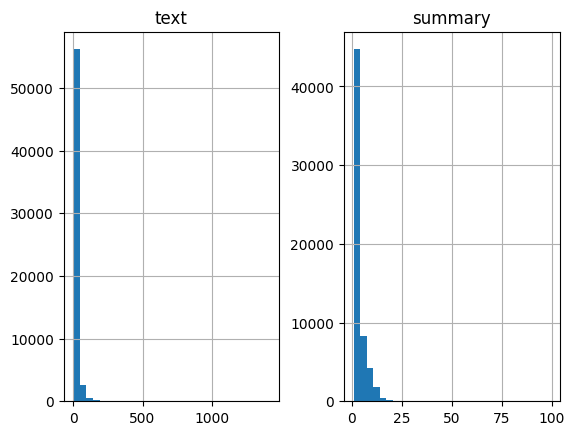

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()


In [ ]:
#Setting max length of the summary as 20, text is 100

cnt=0
for i in df['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(df['cleaned_text']))

0.9866282864458689


In [ ]:
#set max length of review to 50

max_text_len=100
max_summary_len=20

In [ ]:
cleaned_text =np.array(df['cleaned_text'])
cleaned_summary=np.array(df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df_cleaned=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df_cleaned['summary'] = df_cleaned['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
#print(df_cleaned.groupby('text').count())
#print(df_cleaned.groupby('summary').count())
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58831 entries, 0 to 58830
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     58831 non-null  object
 1   summary  58831 non-null  object
dtypes: object(2)
memory usage: 919.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df_cleaned['text']),np.array(df_cleaned['summary']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
print(x_tr.shape)
print(y_tr.shape)

(52947,)
(52947,)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 59.98698763825634
Total Coverage of rare words: 2.3724562426280182


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

7996

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 74.39088983050848
Total Coverage of rare words: 3.3689832405229545


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
print(x_tr.shape)
print(y_tr.shape)


(52947, 100)
(52947, 20)


In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(52947, 52947)

In [ ]:

ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)


In [ ]:
print(x_tr.shape)
print(y_tr.shape)

(52534, 100)
(52534, 20)


In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from tensorflow.keras.layers import Attention

In [ ]:
from keras import backend as K
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_out = Attention()([decoder_outputs,encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 100, 100)             799600    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 100, 300),           481200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

In [ ]:
print(attn_out.shape)
print(decoder_outputs.shape)

(None, None, 300)
(None, None, 1935)


In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=2,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/2
411/411 [==============================] - 443s 1s/step - loss: 1.1554 - val_loss: 0.9697
Epoch 2/2
411/411 [==============================] - 410s 998ms/step - loss: 0.9525 - val_loss: 0.9382


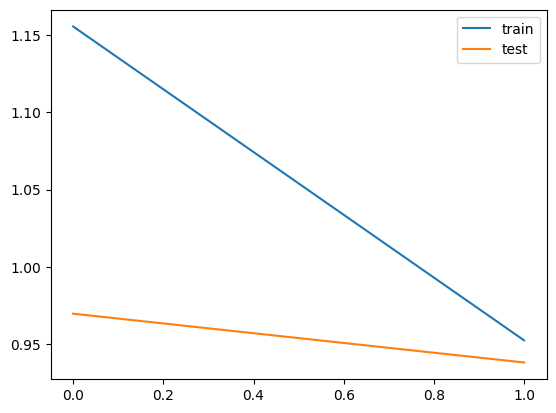

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from google.colab import files

export_dir = './saved_models'
tf.saved_model.save(model, export_dir=export_dir)

In [ ]:
export_dir = './saved_models'
files.download(export_dir + '/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf = Attention()([decoder_outputs2,decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
decoder_model.save("decoder.h5")

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(20,50):
    #print(x_tr[i])
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: liked kit disappointed enough thread number colors type needlework years never run thread like 
Original summary: disappointed 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  great for the the the the the it


Review: awesome use everyday 
Original summary: five stars 
1/1 [==============================] - 0s 24ms/step
Predicted summary:  five stars


Review: good 
Original summary: five stars 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  five stars


Review: purchasing brand blades dull cardboard blades disappoint stays sharp many many projects 
Original summary: very sharp and lasts through many projects 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  great for the the the the the it


Review: unfortunately paint old dried returning 
Original summary: one star 
1/1 [==============================] - 0s 24ms/step
Predicted summary:  five stars


Review: works great like using much easier handle big h

In [ ]:
review="The only drawback of this product is its low grade plastic cap"
print("Review:",seq2text(review))
#print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(review.reshape(1,max_text_len)))
print("\n")

KeyError: 'T'